In [1]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16



from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization


from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16


import numpy as np
from keras.preprocessing import image
import h5py
import matplotlib.pyplot as plt
import cv2

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [2]:
def model_1():
    model = Sequential()

    # Step 1 - Convolutio Layer 
    model.add(Convolution2D(32, 3,  3, input_shape = (64, 64, 3), activation = 'relu'))

    #step 2 - Pooling
    model.add(MaxPooling2D(pool_size =(2,2)))

    # Adding second convolution layer
    model.add(Convolution2D(32, 3,  3, activation = 'relu'))
    model.add(MaxPooling2D(pool_size =(2,2)))

    #Adding 3rd Concolution Layer
    model.add(Convolution2D(64, 3,  3, activation = 'relu'))
    model.add(MaxPooling2D(pool_size =(2,2)))


    #Step 3 - Flattening
    model.add(Flatten())

    #Step 4 - Full Connection
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax'))

    #Compiling The CNN
    model.compile(
                  optimizer = optimizers.SGD(lr = 0.05),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [3]:
def model_2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

In [4]:
 def model_3():
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(10, activation = 'softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model

In [5]:
epoch_size=10

In [6]:
# VGG16 Modeli icin  burayi aciyoruz
#'''
IMG_SIZE = 64
IMAGE_SIZE = [64, 64] 
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(10, activation = 'softmax')(x) 
model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
#'''

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [7]:
'''
IMG_SIZE = 64   #model_1  64
#IMG_SIZE = 300   #model_3  300
model = model_1()
model.summary()
'''

'\nIMG_SIZE = 64   #model_1  64\n#IMG_SIZE = 300   #model_3  300\nmodel = model_1()\nmodel.summary()\n'

In [8]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
training_set = train_datagen.flow_from_directory(
        'new_dataset/train',
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=64,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'new_dataset/test',
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=64,
        class_mode='categorical')

Found 3178 images belonging to 10 classes.
Found 946 images belonging to 10 classes.


In [10]:
labels = (training_set.class_indices)

In [11]:
labels

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [12]:
modelhs = model.fit_generator(training_set,
                         samples_per_epoch = 3178,
                         nb_epoch = epoch_size,
                         validation_data = test_set,
                         nb_val_samples = 946)

/Users/yusufsatilmis/anaconda3/envs/dl3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/Users/yusufsatilmis/anaconda3/envs/dl3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=49, epochs=10, validation_steps=946)`
  """


Epoch 1/10
49/49 [==============================] - 2112s 43s/step - loss: 1.8643 - acc: 0.4085 - val_loss: 1.3726 - val_acc: 0.6384
Epoch 2/10
49/49 [==============================] - 1992s 41s/step - loss: 1.2237 - acc: 0.6623 - val_loss: 1.0425 - val_acc: 0.7135
Epoch 3/10
49/49 [==============================] - 2012s 41s/step - loss: 0.9815 - acc: 0.7378 - val_loss: 0.8737 - val_acc: 0.7707
Epoch 4/10
49/49 [==============================] - 2014s 41s/step - loss: 0.8283 - acc: 0.7874 - val_loss: 0.7725 - val_acc: 0.7947
Epoch 5/10
49/49 [==============================] - 2013s 41s/step - loss: 0.7515 - acc: 0.8061 - val_loss: 0.7083 - val_acc: 0.8213
Epoch 6/10
49/49 [==============================] - 2009s 41s/step - loss: 0.6773 - acc: 0.8309 - val_loss: 0.6677 - val_acc: 0.8191
Epoch 7/10
49/49 [==============================] - 2021s 41s/step - loss: 0.6147 - acc: 0.8552 - val_loss: 0.6315 - val_acc: 0.8267
Epoch 8/10
49/49 [==============================] - 2029s 41s/step - 

In [13]:
model.save('Trained_model_vgg16.h5')
print(modelhs.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


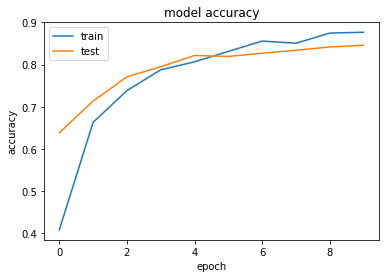

In [14]:
plt.plot(modelhs.history['acc'])
plt.plot(modelhs.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

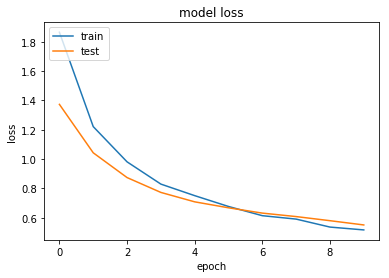

In [15]:
plt.plot(modelhs.history['loss'])
plt.plot(modelhs.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
def x3():
    if result[0][0] == 1:
          return '0'
    elif result[0][1] == 1:
          return '1'
    elif result[0][2] == 1:
          return '2'
    elif result[0][3] == 1:
          return '3'
    elif result[0][4] == 1:
          return '4'
    elif result[0][5] == 1:
          return '5'
    elif result[0][6] == 1:
          return '6'
    elif result[0][7] == 1:
          return '7'
    elif result[0][8] == 1:
          return '8'
    elif result[0][9] == 1:
          return '9'

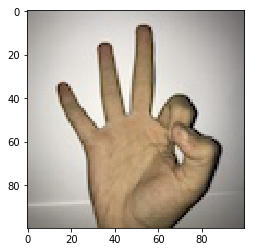

Predict Result ==> 9


In [17]:
path = "test/9.JPG"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

test_image = image.load_img(path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print ("Predict Result ==> "+ str(x3()))

In [18]:
result

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        6.5422385e-25, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [19]:
y_true = []
y_pred = []

for filename in os.listdir("dataset/"):
    for imagename in os.listdir("dataset/"+filename):
        path = "dataset/"+filename+"/"+imagename
        test_image = image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = model.predict(test_image)
        y_true.append(str(filename))
        y_pred.append(str(x3()))


In [20]:
y_true[0:11]

['9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9']

In [21]:
y_pred[0:11]

['9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9']

In [22]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return cm


Confusion matrix, without normalization
[[203   0   0   0   1   0   0   0   0   0   1]
 [  1 170   7   0   0   0   0   0   3   5  20]
 [  0  10 107   5  14   1   0   1   6   3  59]
 [  0   0   3 184   1   1   0   0   1   1  15]
 [  0   0   1   1 188   0   0   1   0   3  13]
 [  0   0   0  12   2 183   0   0   0   0  10]
 [  1   1   4   1 169   0   0   0   1   2  28]
 [  0   0   9   5  70   1   0  12  19  15  75]
 [  3   2   7   7  21   1   0   2  59  34  72]
 [  1   0   3   1   7   0   0   0   0 171  21]
 [  0   0   0   0   0   0   0   0   0   0   0]]


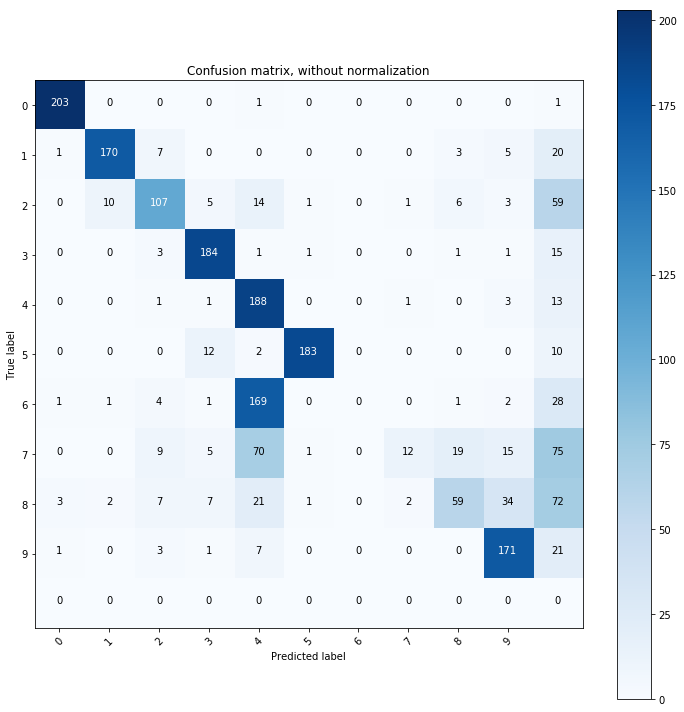

In [23]:
array=confusion_matrix(y_true, y_pred)

labels = ['0','1','2','3','4','5','6','7','8','9']

cm=plot_confusion_matrix(array, classes=labels, title='Confusion matrix, without normalization')